# Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 




### First we are going to import all the important libraries.

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


In [265]:
# Let's import the data file
data = pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratery Data Analysis

We are Starting our most important part of machine learning model building that is EDA.

In [266]:
# Shape of data
data.shape

(891, 12)

data has total 891 rows and 12 columns we will analyse and try to understand what all columns are all about.

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now we have imported the our data set of Titanic Train we can see data has 891 rows and 12 columns, Lets' discuss the columns first:

   * **PassengerId** - Passenger id is absolute data, it is a seriel no. from 1 to 891 so we don't need this column in our dataset to build a model
   * **Survived** - Survived column is target column(Binary Class) which tells whether particular passenger survived the disaster or not.(0 for not survived and 1 for survived) it is our target column we will not touch this column during our EDA.
   * **Pclass** - Pclass column refers as Passenger economic class of traveling.(1=1st class, 2=2nd class, 3=3rd class)
   * **Name** - Name column is name of all the pessangers traveling on the ship.(It's an object data need to convert into integers for our model as model does not accept the string data).
   * **Age** - Passenger's age.
   * **Sex** - Gender of the particular passenger.(Male, Female) we need to convert this into integers as well for our model building.
   * **SibSp** - SibSp column is the count of sibling or spouse of the pessanger.
   * **Parch** - Parch is parents or child of the pessanger if any
   * **Ticket** - Ticket is Ticket no. of the passenger.(this is also an object data we will convert it to integer data)
   * **Fare** - Fare is the amount paid by pessanger to buy the ticket.
   * **Cabin** - Reserved cabin of the pessangers according to their class.(Cabin is a column of object data and also it has lots of NaN values we will look it in detail and will decide what to do with it)
   * **Embarked** - Port of embarkation (From which port pessanger took the ride of ship), (C = Cherbourg; Q = Queenstown; S = Southampton) object data need to convert it in numbers.

In [268]:
data.Survived.value_counts() # counting the value of class

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

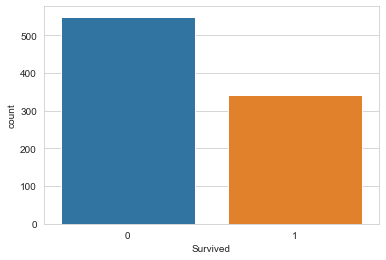

In [269]:
# countplot of survived and not survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

Value count for survived column is ```(0 = 549, 1 = 342)``` By which we can interpret that our data is not much imbalanced 

<AxesSubplot:xlabel='Survived', ylabel='count'>

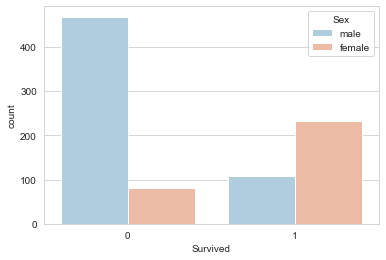

In [270]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

Above seaborne statistical plot of survived with respect to Sex is showing that Female has higher chance of survival than the male. From the total no. of death (0) we can see that 470 male has died and only about 80 Female died. If we see Survival(1) the count of men who survived is about 100+ and comparatively 220 women survived. It looks like you don't wanna be a male if you are riding on Titanic The Unsinkable Ship. The Story of data is matching as of what we have seen in the movie that during the disaster female and childeren were provided the life boat and also we have seen that rich people were the first who got the help first we will see this by analysing survival with class.

<AxesSubplot:xlabel='Survived', ylabel='count'>

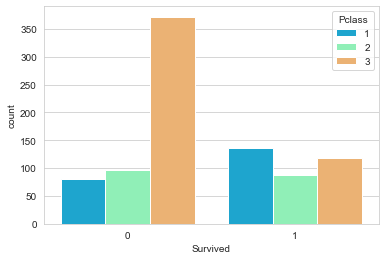

In [271]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

From above countplot of survival with respect to pessanger's class of traveling shows that people of 1st class died very less(about 80 people) comparetivly people of 3rd class(more than 360 people) and also people who survived we can see that from 1st class passenger more people survived(about 130+)

<AxesSubplot:xlabel='Age'>

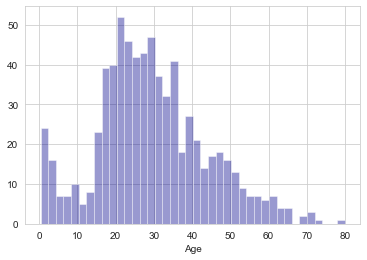

In [272]:
sns.distplot(data['Age'],kde=False,color='darkblue',bins=40)  # data distribution of Age column

From above distplot of age we can analyse the distribution of Age of pessangers traveling on Titanic. We can see that Most of the pessangers who were traveling on ship were between age 18 to 30. there were some aged passenger were also there. a very few pessanger(4 or 5) around age 70 and it looks like one pessanger of age 80 was also onboard on the ship the data looks quit normally distributed few outliers are there but that is okay i guess. 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

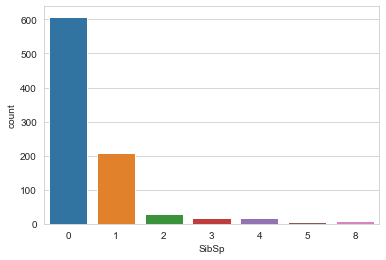

In [273]:
sns.countplot(x='SibSp',data=data) # countplot plot of SibSp

As we know the ```SibSp``` column represents the data about pessanger who were traveling along with their Siblings or Spouse or both. So the above distplot shows there were maximum pessangers around 600+ who were not traveling with their sibling or spouse they were traveling alone. around 200 pessangers had either 1 sibling or spouse. around 200 pessangers were traveling either with their spouse or 1 sibling. And if we go further there were few pessengers who were traveling whose SibSp count is 8 that means total count of siblings along with spouse is 8.

<AxesSubplot:xlabel='Parch', ylabel='count'>

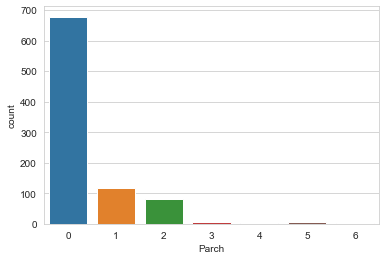

In [274]:
sns.countplot(x='Parch',data=data)

```Parch``` features represents the data about the pessangers who were traveling with their parents and child, in this plot also we can see that maximum people(678) have 0 ```Parch``` value that means they were not traveling with their parents and child. Apart from this there were pessengers who were traveling with their total 1 and 2 parents or childeren. a very few pessengers have the count of parents and childeren (3,4,5 and 6).

<AxesSubplot:xlabel='Fare'>

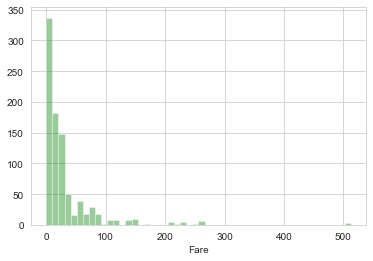

In [275]:
sns.distplot(data['Fare'],kde=False,color='green')

Maximum people paid the price to onnboard the ship was 0 to 10 british pound which is around 340 people paid this price and average price we can see from the distribution plot that average Fare which pessanger paid to onboard the ship is 0 to 30 british pound. there were people(3) who paid more than 500 british pond to onboard the ship. few people(17) who paid the fare between 200 to 300 British pound.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

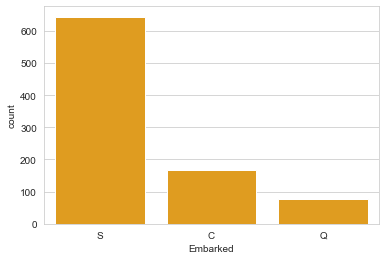

In [276]:
sns.countplot(data['Embarked'],color='orange')

Embarked is the column which shows the embarkation port from which the different different pessanger onboarded the ship in which
   * **S** = Southampton
   * **C** = Cherbourg
   * **Q** = Queenstown
   
These 3 are the ports from where the embarkation of the port was happened and from the data we can understand that the maximum pessanger who were onboarded on the ship was embarked through Southampton port.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

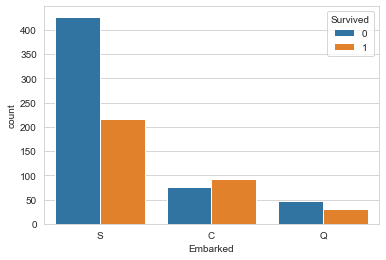

In [277]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue='Survived',data=data)

From above countplot between Embarked and survived we can see that maximum people who died was embarked from Southampton port this is also true because the maximum people were embarked from the southampton port but out of 600+ people from southampton port 400+ were not survived. We can also see that the survival rate of pessenger who embarked from Cherbourg port is more than who died.

## Data Cleaning
#### Let's deal with null values

In [278]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In our data set 3 features has ```NaN``` (Null) Values that is **Age**, **Cabin**, **Embarked** we need to look for it and resolve this for our ML model. Here we can see clearly that out of 891 data **Cabin** feature has 687 ```NaN``` value which is 77% of data which is missing, so filling these amount of ```NaN``` will not help in our ML Model it is better to drop the feature from data set.

First we will look after the ```Age``` column to fill null values. To fill null values in Age column we can apply one simple method that is to replace the null values with the mean of the age. But if we think little smarter we have some other features related to age too like ```Pclass``` Passengers on ship were divided by 3 different classes and each class has their own mean age value. so we can fill the null values on Age column with mean value according to their class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

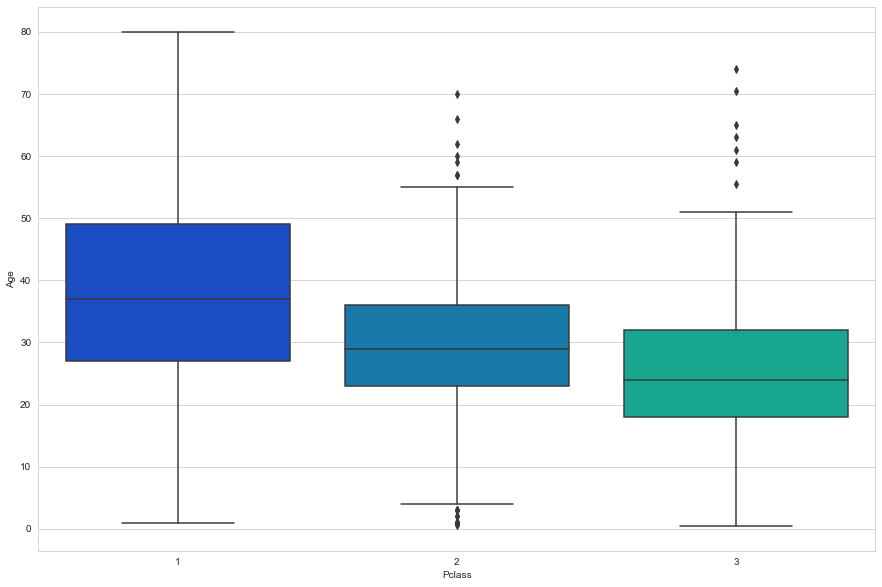

In [279]:
# ploting a boxplot of age and pclass which will give us quantile scores of pclass
plt.figure(figsize=(15,10))
sns.boxplot(x=data['Pclass'],y='Age',data=data,palette='winter')

From above boxplot we have quantile data of Age according to the class of the pessangers. So we can see that Average age of 1st class passenger is 37, Average age of 2nd class passenger is 29 and Average age of 3rd class passenger is 24. So now we will define a function where we can fit these different different class's mean age to the age column according to the class of the pessanger.

In [280]:
def fill_age (col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37 # considering 37 as mean value of 1st class passenger
        elif Pclass==2:
            return 29 # considering 29 as mean value of 2nd class passenger
        else:
            return 24 # considering 24 as the 3rd class passenger's average age
    else:
        return Age

In [281]:
fill_age

<function __main__.fill_age(col)>

In [282]:
# filling the null values in age column by .apply method with the function which we defined.
data['Age'] = data[['Age','Pclass']].apply(fill_age,axis=1) 

In [283]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Null values in Age column has successfully filled with the defined method, now we can see that we do not have any null values in Age column. we have left with the Cabin and Embarked column, let's see what we can do ahead with these two columns. As we can see that Embarked column has only 2 data points missing which is very easy to fill as we know that Titanic had 3 embarkation point that is C, S & Q and the most peaple were embarked on ship from S(Southampton) so we will fill these 2 values with S as the probability of the being S on these Nan value is higher.

In [284]:
# filling null values on Embarked column
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [285]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Embarked and Age both the column's NaN values has been filled, now we have left Cabin column with NaN values. We can see that Cabin column has too many NaN values 687 out 891 that is about 77% data from Cabin column is missing. It's good if we drop this column, also we do not require the PassengerId column as it is absolute seriel no. which is provided to passengers as unique ID and also name of the pessangers and Ticket ID will not help us to find the survival probability of the pessangers too so we will drop the column that is ```PassengerId```, ```Cabin```, ```Name``` & ```Ticket``` from the data set.

#### Let's drop the features which we do not require to build the model

In [286]:
# we will drop Passenger Id column and Cabin column as discussed above
data = data.drop(columns = ['PassengerId','Cabin','Name','Ticket'])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [287]:
# let's recheck our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


We can see that now we don't have any null values in our column. Now we have to take care of object columns, there are 4 columns which data type is object, so let's fix them.

In [288]:
leb_enc = LabelEncoder()

In [289]:
# Let's encode the feature having object data type
embarked = leb_enc.fit_transform(data['Embarked'])
sex = leb_enc.fit_transform(data['Sex'])

In [290]:
# combining all encoded features with original dataset
data['Embarked'] = embarked
data['Sex'] = sex

In [291]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,24.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [293]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [295]:
# Let's check data description
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.066409,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.244532,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [296]:
# checking the correlation between features and label
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.047255,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.408487,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.078421,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.047255,-0.408487,0.078421,1.000000,-0.243526,-0.171095,0.123784,-0.011245
SibSp,-0.035322,0.083081,-0.114631,-0.243526,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.171095,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.123784,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.011245,0.068230,0.039798,-0.224719,1.000000


from above correlation table we can interpret that every feature vs feature and feature vs label has some relation they all are not that much highly related to each other but some relations are there for sure either it is positive relation or negative relation.

Great! Now it looks like that our data is ready to build the model. Now we will build saveral classification machine learning model and we will finalize the best model for our Titanic survival prediction.

# Machine Learning Model Building

First we will saperate the **Class** and **Features** from our dataset than we will standardise our feature data for using ```Standard Scaler``` after that we will divide our dataset into train data and test data.

## Preprocessing

In [297]:
# Let's separate the features and class
x = data.drop(columns = 'Survived')
y = data['Survived']

In [298]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,24.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [299]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Standard Scaler 

In [300]:
# applying standard scaler
scaler = StandardScaler()

In [301]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.82737724,  0.73769513, -0.53383369, ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.67489052, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.23165264, ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.38274316, ...,  2.00893337,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.23165264, ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.22161894, ..., -0.47367361,
        -0.49237783, -0.67817453]])

### Finding Best random state on Logistic Regression.

In [309]:
max_accu = 0
best_rs = 0

for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    log_reg = LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred = log_reg.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy > max_accu:
        max_accu = accuracy
        best_rs = i
print('Best accuracy is ',max_accu, 'on random State',best_rs)

Best accuracy is  0.8789237668161435 on random State 150


We got the best random state for logistic regression, now we will build the logistic regression model with the best random state what we got.

### Creating train test split for our model training and testing

In [320]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=150)

# Logistic Regression Model Building

In [321]:
# model training
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [322]:
# model prediction on test data
y_pred = log_reg.predict(x_test)

In [323]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[123,  11],
       [ 16,  73]], dtype=int64)

In [324]:
# accuracy score
accuracy_score(y_test,y_pred)

0.8789237668161435

In [333]:
# classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       134
           1       0.87      0.82      0.84        89

    accuracy                           0.88       223
   macro avg       0.88      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223



# k-Nearest Neighbors Classification model

In [334]:
from sklearn.neighbors import KNeighborsClassifier  # importing k-Nearest Neighbors

In [335]:
# Model Training with Knn
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [336]:
# prediction on test data
y_pred_knn = knn.predict(x_test)

In [337]:
# confusion matrix
confusion_matrix(y_test,y_pred_knn)

array([[126,   8],
       [ 24,  65]], dtype=int64)

In [338]:
# accuracy_score
accuracy_score(y_test,y_pred_knn)

0.8565022421524664

In [339]:
# classification Report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       134
           1       0.89      0.73      0.80        89

    accuracy                           0.86       223
   macro avg       0.87      0.84      0.84       223
weighted avg       0.86      0.86      0.85       223



# Decision Tree Classification Model

In [340]:
from sklearn.tree import DecisionTreeClassifier  # importing Decision Tree

In [341]:
# model training with Decision Tree Classifier
D_tree = DecisionTreeClassifier()
D_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [342]:
# decision tree prediction on test data
y_pred_dt = D_tree.predict(x_test)

In [343]:
# confusion matrix of decision tree
confusion_matrix(y_test,y_pred_dt)

array([[114,  20],
       [ 17,  72]], dtype=int64)

In [344]:
# accuracy score of decision tree
accuracy_score(y_test,y_pred_dt)

0.8340807174887892

In [346]:
# classification report of decision tree
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       134
           1       0.78      0.81      0.80        89

    accuracy                           0.83       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.83      0.83       223



# Random Forest Classification Model

In [347]:
from sklearn.ensemble import RandomForestClassifier   # importing Random Forest

In [348]:
# model training on random forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [349]:
# random forest model prediction on test data
y_pred_rf = random_forest.predict(x_test)

In [350]:
# model accuracy
accuracy_score(y_test,y_pred_rf)

0.8565022421524664

In [351]:
# confusion matrix
confusion_matrix(y_test,y_pred_rf)

array([[121,  13],
       [ 19,  70]], dtype=int64)

In [353]:
# classification report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       134
           1       0.84      0.79      0.81        89

    accuracy                           0.86       223
   macro avg       0.85      0.84      0.85       223
weighted avg       0.86      0.86      0.86       223



# Support Vector Classification model

In [354]:
from sklearn.svm import SVC   # importing Support vector classifier

In [355]:
# model training on support vector classifier
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [356]:
# support vector classification model prediction on test data
y_pred_svc = svc.predict(x_test)

In [357]:
# support vector model accuracy score
accuracy_score(y_test,y_pred_svc)

0.8878923766816144

In [358]:
# support vector model confusion matrix
confusion_matrix(y_test,y_pred_svc)

array([[129,   5],
       [ 20,  69]], dtype=int64)

In [360]:
# support vector model classification report
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       134
           1       0.93      0.78      0.85        89

    accuracy                           0.89       223
   macro avg       0.90      0.87      0.88       223
weighted avg       0.89      0.89      0.89       223



We have built 5 Classification Machine Learning Algorithm and there score is as follows:-

 * **LogisticRegression Model**  Accuracy Score = ```0.8789237668161435```
 * **k-NearestNeighbors Model**  Accuracy Score = ```0.8565022421524664```
 * **DecisionTree Model**  Accuracy Score = ```0.8340807174887892```
 * **RandomForest Model**  Accuracy Score = ```0.8565022421524664```
 * **SupportVector Model**  Accuracy Score = ```0.8878923766816144```
 
All the 5 models have given the accuracy score very close to each other which is in range of 80 to 90 percent, out of which the support vector classifier has given the highest accuracy that is 88.78% and decision tree has given the lowest score that is 83.40%. 

Now we have to choose the best model out of it but before that we will cross validate our models and than we will analyze the score after cross validation and based on cross validation we will decide our best model.

# Cross validation of models

In [362]:
from sklearn.model_selection import cross_val_score   # importing the cross validation score

In [368]:
# cross validation for logistic regression
cvs = cross_val_score(log_reg, x_scaled, y, cv=10)
print('Cross Validation Score for LogisticRegression is : ',cvs.mean())

Cross Validation Score for LogisticRegression is :  0.8013732833957553


In [374]:
# cross validation for k-nearest Neighbors
cvs = cross_val_score(knn, x_scaled, y, cv=10)
print('Cross Validation Score for LogisticRegression is : ',cvs.mean())

Cross Validation Score for LogisticRegression is :  0.7991510611735331


In [381]:
# cross validation for decision tree
cvs = cross_val_score(D_tree, x_scaled, y, cv=10)
print('Cross Validation Score for LogisticRegression is : ',cvs.mean())

Cross Validation Score for LogisticRegression is :  0.7699750312109863


In [385]:
# cross validation for random forest
cvs = cross_val_score(random_forest, x_scaled, y, cv=10)
print('Cross Validation Score for LogisticRegression is : ',cvs.mean())

Cross Validation Score for LogisticRegression is :  0.8149063670411983


In [390]:
# cross validation for support vector classifier
cvs = cross_val_score(svc, x_scaled, y, cv=10)
print('Cross Validation Score for LogisticRegression is : ',cvs.mean())

Cross Validation Score for LogisticRegression is :  0.8249438202247191


We have successfully done with cross validation of all 5 models with **CV = 10** and got the result as follows:-

 * **LogisticRegression Model**  Cross Validation Score = ```0.8013732833957553```
 * **k-NearestNeighbors Model**  Cross Validation Score = ```0.7991510611735331```
 * **DecisionTree Model**  Cross Validation Score = ```0.7699750312109863```
 * **RandomForest Model**  Cross Validation Score = ```0.8149063670411983```
 * **SupportVector Model**  Cross Validation Score = ```0.8249438202247191```
 
Now one thing is sure that Support Vector Classifier Machine learning algorithm has given the best score in both ```accuracy_score``` and ```cross_val_score```. But as we know we have to check for the minimum difference between ```accuracy_score``` and ```cross_val_score```, and whichever model has the minimum difference between ```accuracy_score``` and ```cross_val_score``` would be the best model. So to check that I have counted the difference of both on a excel sheet. The result is as follows:


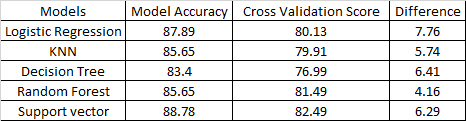

from this table we can see that Random Forest model has the minimum difference between ```accuracy_score``` and ```cross_val_score``` that is 4.16. So according to this theory our best fit model is Random forest.

We are going to plot the ```roc_auc_curve``` for our models then we will find out which model has largest ```roc_auc_score``` and if it matches with random forest we will finalize Random forest as our final model and if it would be support vector than we will finalise support vector as our final model.

# Ploting auc_roc_curve to find out the best model.

### Let's find out the ```roc_auc_score``` of all models.

In [391]:
# logistic regression
roc_auc_score(y_test,y_pred)

0.8690675834311589

In [392]:
# knn model
roc_auc_score(y_test,y_pred_knn)

0.835317793057186

In [393]:
# decision tree model
roc_auc_score(y_test,y_pred_dt)

0.8298675163508301

In [394]:
# random forest model
roc_auc_score(y_test,y_pred_rf)

0.8447509642797251

In [395]:
# support vector model
roc_auc_score(y_test,y_pred_svc)

0.8689837330202917

# ROC AUC Curve for the mitted model

In [402]:
from sklearn.metrics import plot_roc_curve  # importing plot_roc_curve metrics

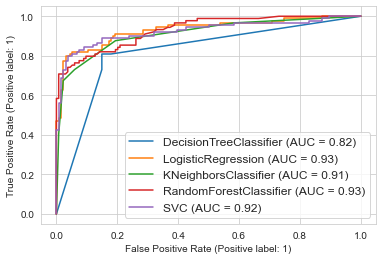

In [413]:
disp = plot_roc_curve(D_tree,x_test,y_test)
plot_roc_curve(log_reg,x_test,y_test,ax=disp.ax_)  # ax_ = Axes with confusion matrix
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(random_forest,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':12},loc = 'lower right')
plt.show()

Great! we have successfully ploted the ```roc_auc_curve``` and got the AUC score for all the models. We can see that that we have 2 winners with same score that is ```LogisticRegression``` and ```RandomForestClassifier``` score for both the model is 93%. Before ploting the ```roc_auc_curve``` we already had a analysis of best model based on cross validation score difference with accuracy score and we got that ```RandomForestClassifier``` had the minimum difference and here also we got ```RandomForestClassifier``` having the highest AUC score. So we are going to finalize ```RandomForestClassifier``` as our model for prediction the survival of Passenger on Titanic Disaster.

Now we will do some Hyperparameter tuning with ```RandomForestClassifier``` model to see if we can get the more accuracy with this model if possible. 

# Hyper parameter Tuning

In [414]:
from sklearn.model_selection import GridSearchCV    # IMPORTING THE GRIDSEARCHCV

In [426]:
# Setting parameters
parameters = {'n_estimators':[11,13,15,17,19,21,23,25,27,29],
             'criterion':['gini','entropy'],
             'max_depth':[5,10,15,20,25,30],
             'min_samples_split':[10,11,12,13,14,15,16,17,18,19,20],
             'min_samples_leaf':[5,6,7,8,9,10]
             }

In [427]:
grid_search = GridSearchCV(random_forest,param_grid=parameters)

In [428]:
# training with given parameters to get the best parameters
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [10, 11, 12, 13, 14, 15, 16, 17,
                                               18, 19, 20],
                         'n_estimators': [11, 13, 15, 17, 19, 21, 23, 25, 27,
                                          29]})

In [429]:
# best parameters
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 6,
 'min_samples_split': 16,
 'n_estimators': 17}

In [430]:
random_forest = grid_search.best_estimator_

In [431]:
# training the model with best parameters what we got through gridsearchcv
random_forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=6,
                       min_samples_split=16, n_estimators=17)

In [432]:
# prediction of test data
y_pred_rf = random_forest.predict(x_test)

In [433]:
# accuracy score
accuracy_score(y_test,y_pred_rf)

0.8834080717488789

In [434]:
# confusion matrix
confusion_matrix(y_test,y_pred_rf)

array([[129,   5],
       [ 21,  68]], dtype=int64)

In [435]:
# classification report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       134
           1       0.93      0.76      0.84        89

    accuracy                           0.88       223
   macro avg       0.90      0.86      0.87       223
weighted avg       0.89      0.88      0.88       223



Wow! It took almost 30 minute while tuning!!!

we have done with the Hyper Parameter Tuning with some good productivity as we increased our accuracy score by almost 3% which is great Earlier the accuracy was 85.65%, now with hyperparameter tuning it increased upto 88.34%.

So we have done with our model building and we have ended up building random forest classifier model for our Titanic Disaster Passenger's Survival Prediction. Now we will save the model and after that our project is ready.

# Model saving

In [436]:
import pickle

In [437]:
file_name = 'Titanic_Model.pickle'
pickle.dump(random_forest,open(file_name,'wb'))

Model has been saved successfully. Let's check by predicting the loaded model

# Loading the saved model

In [438]:
loaded_model = pickle.load(open(file_name,'rb'))

In [439]:
# Predicting with loaded model
predictions = loaded_model.predict(x_test)

In [441]:
# making Data Frame
predictions = pd.DataFrame(predictions)

In [442]:
predictions

,0
0,0
1,0
2,1
3,1
4,0
...,...
218,1
219,0
220,0
221,0


# FINISHED

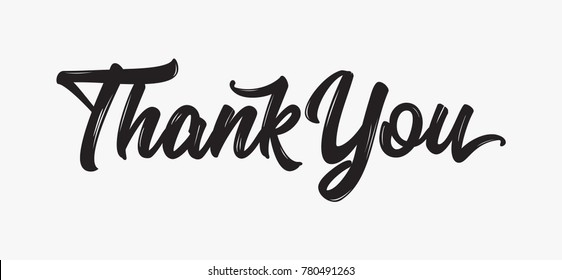